In [2]:
import cv2
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
angry = cv2.imread('emotion_data/train/angry/56.jpg')

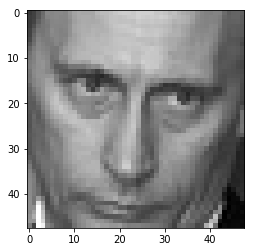

In [3]:
plt.imshow(angry)

In [4]:
angry.shape

(48, 48, 3)

In [5]:
# Image generation Data

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [6]:
image_gen = ImageDataGenerator(rotation_range = 30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

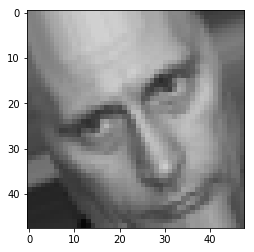

In [7]:
plt.imshow(image_gen.random_transform(angry))
# plt.imshow(image_gen.random_transform(cat))

In [8]:
image_gen.flow_from_directory('emotion_data/test/').class_indices

Found 7066 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [3]:
from keras.models import Sequential

Using TensorFlow backend.


In [10]:
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,Activation,Dropout

In [11]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (48,48,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (48,48,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), input_shape = (48,48,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3), input_shape = (48,48,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 512)        

In [13]:
batch_size = 128

In [14]:
train_image_gen = image_gen.flow_from_directory('emotion_data/train',
                                               target_size = (48,48),
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 28821 images belonging to 7 classes.


In [15]:
test_image_gen = image_gen.flow_from_directory('emotion_data/test',
                                               target_size = (48,48),
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 7066 images belonging to 7 classes.


In [16]:
result = model.fit_generator(train_image_gen,epochs=20,steps_per_epoch = 150, validation_data=test_image_gen,validation_steps=12)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
150/150 [==============================] - 456s 3s/step - loss: 1.8357 - accuracy: 0.2330 - val_loss: 1.7391 - val_accuracy: 0.2663
Epoch 2/20
150/150 [==============================] - 231s 2s/step - loss: 1.7913 - accuracy: 0.2573 - val_loss: 1.7184 - val_accuracy: 0.2812
Epoch 3/20
150/150 [==============================] - 170s 1s/step - loss: 1.7419 - accuracy: 0.2830 - val_loss: 1.7445 - val_accuracy: 0.2988
Epoch 4/20
150/150 [==============================] - 122s 815ms/step - loss: 1.6867 - accuracy: 0.3263 - val_loss: 1.5402 - val_accuracy: 0.3548
Epoch 5/20
150/150 [==============================] - 229s 2s/step - loss: 1.6176 - accuracy: 0.3640 - val_loss: 1.4934 - val_accuracy: 0.4052
Epoch 6/20
150/150 [==============================] - 152s 1s/step - loss: 1.5402 - accuracy: 0.4071 - val_loss: 1.6217 - val_accuracy: 0.4427
Epoch 7/20
150/150 [==============================] - 236s 2s/step - loss: 1.4861 - accurac

In [17]:
result.history['accuracy']

[0.23296496,
 0.25731945,
 0.28302082,
 0.32634997,
 0.36395833,
 0.40711257,
 0.4294244,
 0.45333335,
 0.46713457,
 0.4769811,
 0.4915625,
 0.4951553,
 0.5031687,
 0.5122296,
 0.5209896,
 0.5186458,
 0.5256377,
 0.5305609,
 0.5421354,
 0.5384696]

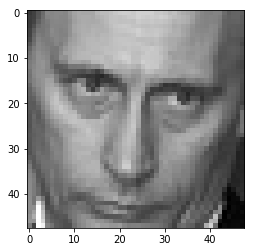

In [27]:
plt.imshow(angry)

In [186]:
img_file = 'emotion_data/test/surprise/10056.jpg'

In [187]:
from keras.preprocessing import image

In [188]:
img = image.load_img(img_file, target_size=(48,48))



In [189]:
import numpy as np

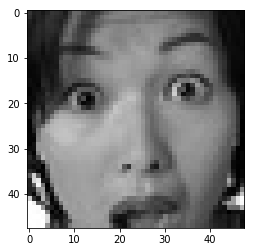

In [190]:
img = image.img_to_array(img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [191]:
gray = np.expand_dims(gray, axis=0)

In [192]:
gray.shape

(1, 48, 48)

In [193]:
gray = gray.reshape(1,48,48,1)

In [194]:
gray.shape

(1, 48, 48, 1)

In [195]:
model.predict_classes(gray)

array([6], dtype=int64)

In [196]:
image_gen.flow_from_directory('emotion_data/test/').class_indices

Found 7066 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [198]:
model.save('emotion_model.h5')

In [6]:
from keras.models import load_model
newmodel = load_model('emotion_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [8]:
import copy 
import numpy as np

face_cascade = cv2.CascadeClassifier('Data/haarcascades/haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(0)
import copy

while True:
    
    ret, frame = cap.read()
    img = copy.deepcopy(frame)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor =  1.3,minNeighbors =  5)
    for (x,y,w,h) in faces:
        fc = gray[y:y+h, x:x+w]
        
        roi = cv2.resize(fc, (48,48))
        
        pred = newmodel.predict(roi[np.newaxis, :, :, np.newaxis])
        text_idx=np.argmax(pred)
        text_list = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
        if text_idx == 0:
            text= text_list[0]
        if text_idx == 1:
            text= text_list[1]
        elif text_idx == 2:
            text= text_list[2]
        elif text_idx == 3:
            text= text_list[3]
        elif text_idx == 4:
            text= text_list[4]
        elif text_idx == 5:
            text= text_list[5]
        elif text_idx == 6:
            text= text_list[6]
        cv2.putText(img, text, (x, y-5),
           cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0, 255), 2)
        img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
            
    
    cv2.imshow("frame", img)
    key = cv2.waitKey(1) & 0xFF
    if key== ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()
